# Myanmar Coup fatality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [1]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [2]:
tables = camelot.read_pdf("Recent-Fatality-List-for-July-10-2021-English.pdf", pages='1-end')
tables.n

58

In [3]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of \nIncident,Deceased \nDate,Organization,Place of \nIncidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi \nNyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, \nbetween 37 and \n38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko \nNa Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, \nLower \nPaunglaung \nHydro P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup \nprotests i..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, \nTanintharyi \nRegion",Toe Chal Ward,Myeik,Tanintharyi \nRegion,"On 15 February evening, 18-year old \nMaung Na..."
4,4,Thet Naing Win @ Min \nMin,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, \nMandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,843,Ba Gyan,M,30,Unknown Name,06-Jul-21,06-Jul-21,Farmer,on the road,New Village,Hopin,Kachin State,"On the night of July 6, Ba Gyan, a \ncivilian ..."
844,844,Aye Min,M,25,Unknown Name,07-Jul-21,07-Jul-21,Carpenter,At the work \nplace,,Kale,Sagaing Region,"In the morning of July 7, Aye Min, \nfrom Pauk..."
845,845,Mee,F,,Unknown Name,07-Jul-21,07-Jul-21,Civilian,near \nBalaminhtin \nbridge,"Mainer, \nMakhawyan \nVillage",Waingmaw,Kachin State,She is from Makhawyan Village in \nMainer Vill...
846,846,Phyo Hlaing Win,M,26,Unknown Name,08-Jul-21,08-Jul-21,Civilian,Industrial Zone,Sarkhar Village,Myingyan,Mandalay Region,He was shot dead unprovoked while \nhe was pas...


## Cleanup data
Cleanup newline (\n)

In [5]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,843,Ba Gyan,M,30,Unknown Name,06-Jul-21,06-Jul-21,Farmer,on the road,New Village,Hopin,Kachin State,"On the night of July 6, Ba Gyan, a civilian wh..."
844,844,Aye Min,M,25,Unknown Name,07-Jul-21,07-Jul-21,Carpenter,At the work place,,Kale,Sagaing Region,"In the morning of July 7, Aye Min, from Pauk K..."
845,845,Mee,F,,Unknown Name,07-Jul-21,07-Jul-21,Civilian,near Balaminhtin bridge,"Mainer, Makhawyan Village",Waingmaw,Kachin State,She is from Makhawyan Village in Mainer Villag...
846,846,Phyo Hlaing Win,M,26,Unknown Name,08-Jul-21,08-Jul-21,Civilian,Industrial Zone,Sarkhar Village,Myingyan,Mandalay Region,He was shot dead unprovoked while he was passi...


Fix column names

In [6]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Adress', 'Township', 'States/Regions Remarks', ''],
      dtype=object)

In [7]:
header[-4] = 'Home Address'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [8]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,5,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,843,Ba Gyan,M,30,Unknown Name,06-Jul-21,06-Jul-21,Farmer,on the road,New Village,Hopin,Kachin State,"On the night of July 6, Ba Gyan, a civilian wh..."
844,844,Aye Min,M,25,Unknown Name,07-Jul-21,07-Jul-21,Carpenter,At the work place,,Kale,Sagaing Region,"In the morning of July 7, Aye Min, from Pauk K..."
845,845,Mee,F,,Unknown Name,07-Jul-21,07-Jul-21,Civilian,near Balaminhtin bridge,"Mainer, Makhawyan Village",Waingmaw,Kachin State,She is from Makhawyan Village in Mainer Villag...
846,846,Phyo Hlaing Win,M,26,Unknown Name,08-Jul-21,08-Jul-21,Civilian,Industrial Zone,Sarkhar Village,Myingyan,Mandalay Region,He was shot dead unprovoked while he was passi...


Drop total number row

In [9]:
dataset = dataset.drop(index=len(dataset))

Expand combined row

In [10]:
def extract_number_from_string(str):
    numbers = [int(s) for s in str.split() if s.isdigit()]

    if len(numbers) > 0:
        return numbers[0]
    return ''

combined_row = dataset['Name'].map(extract_number_from_string)

for rowIndex in combined_row[combined_row != ''].index: 
    for i in range(combined_row[rowIndex] - 1):
        dataset = dataset.append(dataset.iloc[rowIndex])

dataset


,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,5,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
656,656,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."


Drop unused columns

In [11]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address', 'Deceased Date', 'Place of Incidents', 'Township', 'States/Regions', 'Remarks'])
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,08-Feb-21,Civilian
2,F,19,09-Feb-21,Civilian
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student


## Explore data

In [12]:
dataset.describe()

,Sex,Age,Date of Incident,Organization
count,899,899,899,899
unique,4,65,110,71
top,M,,27-Mar-21,Civilian
freq,804,189,164,688


In [13]:
dataset['Sex'].value_counts()

M       804
F        60
         34
LGBT      1
Name: Sex, dtype: int64

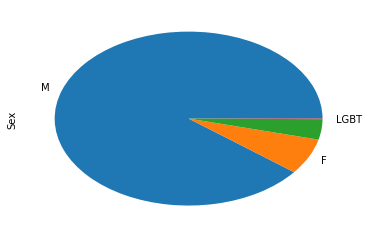

In [14]:
dataset['Sex'].value_counts().plot(kind='pie')


In [15]:
dataset['Age'].value_counts()

                     189
19                    97
20                    38
30                    32
25                    29
                    ... 
1 yrs and 6 month      1
63                     1
75                     1
64                     1
11                     1
Name: Age, Length: 65, dtype: int64

In [16]:
def parse_age(str):
  if str.find(' ') > 0:
    return str.split()[0]
  
  return str

dataset['Age'] = dataset['Age'].apply(parse_age)

(array([  3., 169., 227., 163.,  96.,  37.,  10.,   3.,   1.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

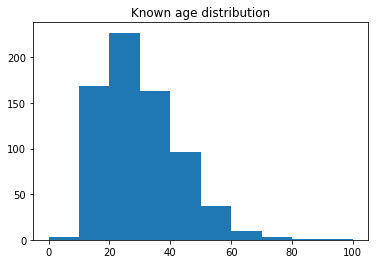

In [17]:
ages = dataset['Age'].to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])

In [18]:
dataset['Organization'].value_counts()

Civilian                               688
Student                                107
                                        17
Teacher                                  7
Engineer                                 3
                                      ... 
Former Sithar Village Administrator      1
Security of Wesali hospital              1
Bank staff (MFI)                         1
Student (Engineer)                       1
Women for Justice (WJ)                   1
Name: Organization, Length: 71, dtype: int64

In [19]:
def conbine_organization(org):
    lower_org = org.lower()
    if 'student' in lower_org or 'b.a' in lower_org:
        return 'Student'
    elif 'doctor' in lower_org or 'nurse' in lower_org:
        return 'Doctor/Nurse'
    elif 'nld' in lower_org:
        return 'NLD'
    elif 'engineer' in lower_org:
        return 'Engineer'
    elif 'teacher' in lower_org:
        return 'Teacher'
    elif 'bank staff' in lower_org or 'kbz' in lower_org:
        return 'Bank Staff'
    elif 'servant' in lower_org or 'department' in lower_org:
        return 'Civil Servant'
    elif 'civilian' in lower_org:
        return 'Civilian'
    elif 'activist' in lower_org:
        return 'Activist'
    else:
        return org

grouped_organizations = dataset['Organization'].apply(conbine_organization)
grouped_organizations.value_counts()

Civilian                                  690
Student                                   126
                                           17
Teacher                                     9
NLD                                         6
Engineer                                    5
Doctor/Nurse                                5
Civil Servant                               4
Bank Staff                                  4
Poet                                        3
Volunteer                                   2
Worker Association                          2
Activist                                    2
CDM Police                                  1
Business men                                1
Farmer                                      1
Firefighter                                 1
Futsal Goalkeeper                           1
Super Market staff                          1
Shan Youth                                  1
Tourist Guide                               1
King & Queen Hotel Staff          

In [20]:
grouped_organizations_counts = grouped_organizations.value_counts()

def cut_other_organizations(org):
    if grouped_organizations_counts[org] < 4:
        return 'Other'
    return org

grouped_organizations = grouped_organizations.apply(cut_other_organizations)
grouped_organizations.value_counts()

Civilian         690
Student          126
Other             33
                  17
Teacher            9
NLD                6
Doctor/Nurse       5
Engineer           5
Civil Servant      4
Bank Staff         4
Name: Organization, dtype: int64

In [21]:
dataset['Organization'] = grouped_organizations
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,08-Feb-21,Civilian
2,F,19,09-Feb-21,Civilian
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student


## Export JSON

In [22]:
dataset.columns = ['sex', 'age', 'dateOfIncident', 'organization']
dataset

,sex,age,dateOfIncident,organization
1,M,32,08-Feb-21,Civilian
2,F,19,09-Feb-21,Civilian
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student
656,M,19,09-Apr-21,Student


In [23]:
dataset.to_csv('recent-fatality.csv', index=False)